In [1]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

<b>Question 1: Use yfinance to Extract Stock Data</b>

Reset the index, save, and display the first five rows of the tesla_data dataframe using the head function. Upload a screenshot of the results and code from the beginning of Question 1 to the results below.

In [7]:
tesla_stock = yf.Ticker('TSLA')

In [8]:
tesla_df = tesla_stock.history(period="max")

In [9]:
tesla_df.reset_index(inplace=True)
tesla_df.head(5)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,281494500,0,0.0
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,257806500,0,0.0
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,123282000,0,0.0
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,77097000,0,0.0
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,103003500,0,0.0


<b>Question 2: Use Webscraping to Extract Tesla Revenue Data<b>

Display the last five rows of the tesla_revenue dataframe using the tail function. Upload a screenshot of the results.

In [11]:
target_url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
# above mentioned link comes first on google searches when searched with keywords "Tesla Revenue"
html = requests.get(target_url)
html_text = html.text

In [52]:
soup = BeautifulSoup(html_text,"html5lib")

In [53]:
t_revenue = pd.DataFrame(columns=['Date', 'Revenue'])

In [54]:
tables = soup.find_all('table')

In [61]:
for table in tables:
    if 'Tesla Quarterly Revenue' in table.find('th').text:
        for row in table.find_all('tr'):
            col = row.find_all('td')
            if col != []:
                date = col[0].text
                revenue = col[1].text.replace(',','').replace('$','')
                t_revenue = t_revenue.append({"Date":date, "Revenue":revenue}, ignore_index=True)

In [62]:
t_revenue = t_revenue[t_revenue['Revenue'].astype(bool)]

In [63]:
t_revenue.tail(5)

,Date,Revenue
101,2010-09-30,31
102,2010-06-30,28
103,2010-03-31,21
105,2009-09-30,46
106,2009-06-30,27


<b>Question 3: Use yfinance to Extract Stock Data<b>

Reset the index, save, and display the first five rows of the gme_data dataframe using the head function. Upload a screenshot of the results and code from the beginning of Question 1 to the results below.

In [97]:
gme = yf.Ticker('GME')
gme_df = gme.history(period='max')
gme_df.reset_index(inplace=True)
gme_df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13,1.620128,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15,1.683251,1.687459,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19,1.666418,1.666418,1.578048,1.607505,7410400,0.0,0.0
4,2002-02-20,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


<b>Question 4: Use Webscraping to Extract GME Revenue Data</b>

Display the last five rows of the gme_revenue dataframe using the tail function. Upload a screenshot of the results.

In [88]:
target_url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
# above mentioned link comes first on google searches when searched with keywords "Gamestop Revenue"
html = requests.get(target_url)
html_text = html.text

In [89]:
soup = BeautifulSoup(html_text,"html5lib")

In [90]:
gme_revenue = pd.DataFrame(columns=['Date', 'Revenue'])

In [91]:
tables = soup.find_all('table')

In [92]:
for table in tables:
    if 'GameStop Quarterly Revenue' in table.find('th').text:
        for row in table.find_all('tr'):
            col = row.find_all('td')
            if col != []:
                date = col[0].text
                revenue = col[1].text.replace(',','').replace('$','')
                gme_revenue = gme_revenue.append({"Date":date, "Revenue":revenue}, ignore_index=True)

In [93]:
gme_revenue = gme_revenue[gme_revenue['Revenue'].astype(bool)]

In [94]:
gme_revenue.tail(5)

,Date,Revenue
50,2010-01-31,3524
51,2009-10-31,1835
52,2009-07-31,1739
53,2009-04-30,1981
54,2009-01-31,3492


In [149]:
def make_graph(dataframe):
    plt.figure(figsize=(15,5))
    plt.plot(dataframe['Date'],dataframe['Close'],label="History")
    plt.title("Closing Price")
    plt.xlabel('Date',fontsize=13)
    plt.ylabel('Close Price',fontsize=13)

<b>Question 5: Plot Tesla Stock Graph</b>

Use the make_graph function to graph the Tesla Stock Data, also provide a title for the graph.

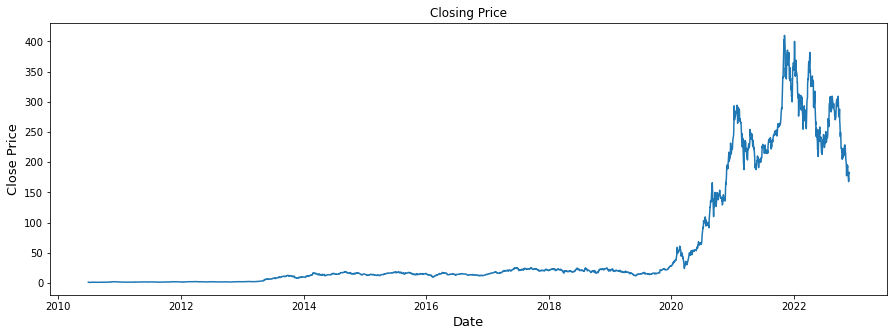

In [152]:
make_graph(tesla_df)

<b>Question 6: Plot GameStop Stock Graph</b>

Use the make_graph function to graph the GameStop Stock Data, also provide a title for the graph.

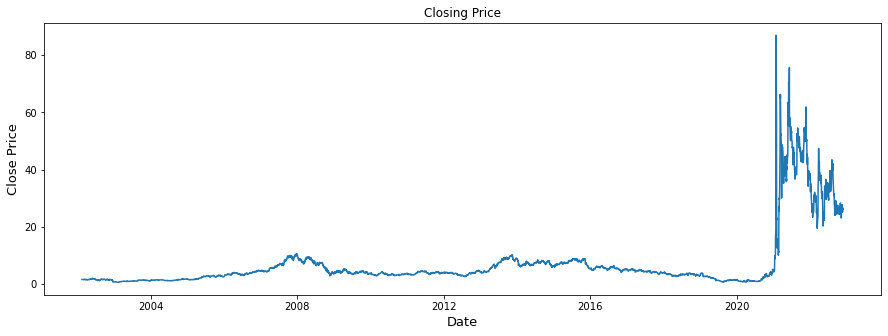

In [153]:
make_graph(gme_df)